<a href="https://colab.research.google.com/drive/1VUoUSK0Xc8wbxXDCLhQJQDxB8dvVKHzD?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality
- Nama: Bagas Shalahuddin Wahid
- Email: bagassw42@gmail.com
- ID Dicoding: bagas_shw

## Import Libraries

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

## **1. Data Wrangling**

### **1.1 Gathering Data**

In [51]:
! gdown "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100% 7.96M/7.96M [00:00<00:00, 90.6MB/s]


In [52]:
!unzip -o "Air-quality-dataset.zip"

Archive:  Air-quality-dataset.zip
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv  
  inflating: PRSA_Data_20130301-20170228/P

In [53]:
# Data Acquisition
data_folder = "PRSA_Data_20130301-20170228/"
data_frames = {}
for file in os.listdir(data_folder):
    df_label = file.split('.')[0].split('_')[2]
    data_frames[df_label] = pd.read_csv(os.path.join(data_folder, file)).drop(['No'], axis=1)

In [54]:
# Check datatypes
dtype_dict = {}

# Iterate through DataFrames and collect data types
for df_name, df in data_frames.items():
    dtype_dict[df_name] = df.dtypes

pd.DataFrame(dtype_dict).transpose()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Tiantan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Shunyi,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Wanshouxigong,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Guanyuan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Wanliu,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Nongzhanguan,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Aotizhongxin,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Huairou,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Changping,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object
Dingling,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object


### **1.2 Assessing Data**

In [55]:
# Simplify variables
def merge_date_columns(df):
    df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    return df.drop(['year', 'month', 'day', 'hour'], axis=1)

for name, data_frame in data_frames.items():
    data_frames[name] = merge_date_columns(data_frame)

In [56]:
# Check Duplicates
duplicate_totals = {}
sample_size_totals = {}

# Loop through each DataFrame to compute and record duplicate and total sample counts
for key, dataframe in data_frames.items():
    duplicate_totals[key] = dataframe.duplicated().sum()  # Count of duplicate rows
    sample_size_totals[key] = dataframe.shape[0]  # Total number of rows

# Convert the dictionaries to DataFrames for duplicates and total samples
df_duplicate_counts = pd.DataFrame.from_dict(duplicate_totals, orient='index', columns=['Duplicates'])
df_sample_sizes = pd.DataFrame.from_dict(sample_size_totals, orient='index', columns=['Sample Size'])

# Merge the two DataFrames side by side
combined_df = pd.concat([df_sample_sizes, df_duplicate_counts], axis=1)
combined_df

,Sample Size,Duplicates
Tiantan,35064,0
Shunyi,35064,0
Wanshouxigong,35064,0
Guanyuan,35064,0
Wanliu,35064,0
Nongzhanguan,35064,0
Aotizhongxin,35064,0
Huairou,35064,0
Changping,35064,0
Dingling,35064,0


In [57]:
# Count Null Values
counts_of_nulls = {}

# Iterating through each DataFrame to count and store null values
for name, data_frame in data_frames.items():
    counts_of_nulls[name] = data_frame.isnull().sum()

# Creating a DataFrame from the null value counts and transposing it for better readability
null_values_df = pd.DataFrame(counts_of_nulls).T
null_values_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp
Tiantan,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Wanshouxigong,696,484,669,754,1297,1078,19,19,19,19,79,13,0,0
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Wanliu,382,284,575,1070,1812,2107,20,20,20,20,123,14,0,0
Nongzhanguan,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Changping,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0


### **1.3 Data Preparation and Cleaning**

In [58]:
# Handling Missing Data (numerical missing values with the median value & categorical missing values with their surrounding value)
for name, data_frame in data_frames.items():
    numeric_cols = data_frame.select_dtypes(include=['number']).columns
    data_frame[numeric_cols] = data_frame[numeric_cols].fillna(data_frame[numeric_cols].median())
    data_frame['wd'] = data_frame['wd'].fillna(method='ffill')

In [59]:
# Count Null Values
counts_of_nulls = {}

# Iterating through each DataFrame to count and store null values
for name, data_frame in data_frames.items():
    counts_of_nulls[name] = data_frame.isnull().sum()

# Creating a DataFrame from the null value counts and transposing it for better readability
null_values_df = pd.DataFrame(counts_of_nulls).T
null_values_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp
Tiantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wanshouxigong,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wanliu,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aotizhongxin,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# Combined DataFrame for Analysis
combined_data = pd.concat(data_frames.values(), ignore_index=True)
combined_data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng,2017-02-28 19:00:00
420764,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng,2017-02-28 20:00:00
420765,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng,2017-02-28 21:00:00
420766,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng,2017-02-28 22:00:00


## **2. Exploratory Data Analysis (EDA)**

In [61]:
combined_data.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.539869,1010.746005,2.491120,0.064416,1.729444
std,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430772,10.469428,13.787259,0.820626,1.245961
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


* **Enhance the DataFrame by including a new column that reflects the most severe air quality category determined from the six different air quality parameters**

In [62]:
# Declaring air quality categories and upper bounds for different pollutants
aqi_categories = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
limits_pm25 = [12, 35.4, 150.4, 250.4, float('inf')]
limits_pm10 = [54, 154, 254, 354, 424, float('inf')]
limits_so2 = [35, 75, 185, 304, 604, float('inf')]
limits_no2 = [53, 100, 360, 649, 1249, float('inf')]
limits_co = [4400, 9400, 12400, 15400, 30400, float('inf')]
limits_o3 = [54, 70, 85, 105, 200, float('inf')]

# Function to determine the air quality category for a given value and its pollutant ranges
def find_category(value, threshold_ranges):
    for upper_limit in threshold_ranges:
        if value <= upper_limit:
            return threshold_ranges.index(upper_limit)

# Adding a 'Category' column to the DataFrame by applying the find_category function
combined_data['Category'] = combined_data.apply(lambda row: aqi_categories[max(
    find_category(row['PM2.5'], limits_pm25),
    find_category(row['PM10'], limits_pm10),
    find_category(row['SO2'], limits_so2),
    find_category(row['NO2'], limits_no2),
    find_category(row['CO'], limits_co),
    find_category(row['O3'], limits_o3)
)], axis=1)

In [63]:
combined_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp,Category
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00,Unhealthy for Sensitive Groups
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00,Unhealthy for Sensitive Groups
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00,Unhealthy for Sensitive Groups
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00,Unhealthy for Sensitive Groups
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00,Moderate


In [64]:
# Data Export
combined_data.to_csv("/content/combined_air_quality_data.csv", index=False)

## **3. Visualization & Explanatory Analysis**

### **3.1 Is there a notable correlation among various pollutants and between pollutants and weather conditions?**

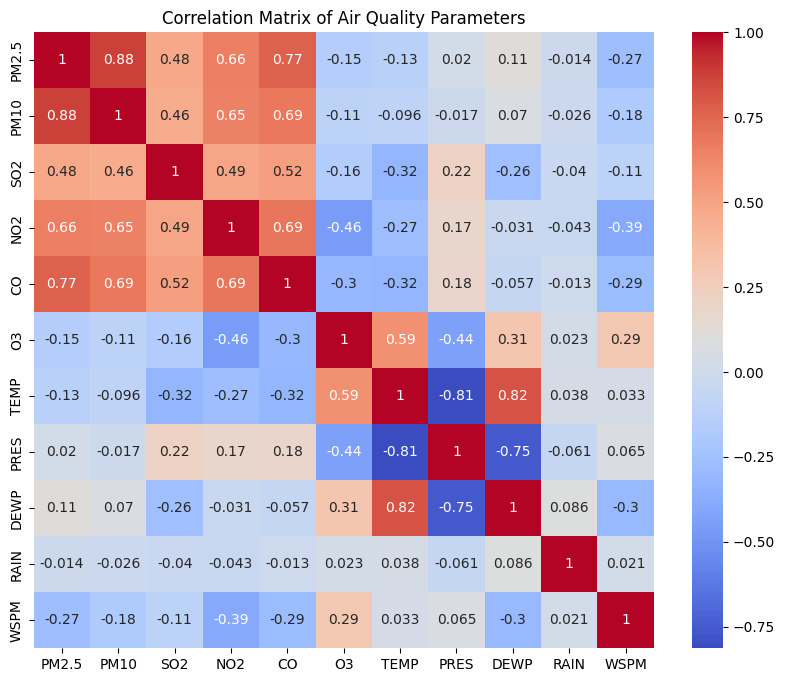

In [65]:
# Correlation Matrix
corr_matrix = combined_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Air Quality Parameters")
plt.show()

> The heatmap analysis provides key insights into the relationships between air quality and weather parameters. There's a strong correlation between PM2.5 and PM10, indicating that they often increase or decrease together. Elevated levels of PM2.5 are also associated with higher concentrations of SO2, NO2, and CO, signifying worsening air quality.

> Interestingly, higher ozone levels correlate with lower levels of these pollutants, possibly due to ozone's role in chemical reactions that reduce pollution. Weather factors like temperature and wind speed also influence air quality. Higher temperatures often correlate with increased dew points, and warmer conditions may lower levels of certain pollutants due to enhanced dispersion. Conversely, higher wind speeds help disperse pollutants, leading to lower concentrations of PM2.5, PM10, SO2, NO2, and CO. Rainfall shows minimal impact on these variables, indicating its limited influence on air quality and weather conditions studied.

> These findings highlight the complex interplay between various environmental factors and their collective impact on air quality.

### **3.2 What is the distribution of air quality index (AQI) categories across different monitoring stations?**

In [66]:
# Generate a table showing the frequency of each AQI category by station
station_category_distribution = pd.crosstab(combined_data['station'], combined_data['Category'])

# Arrange the columns in a specific order as defined earlier
station_category_distribution[aqi_categories]

Category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
station,,,,,,
Aotizhongxin,1623,6309,14257,5723,5641,1511
Changping,2238,7943,13447,5217,4972,1247
Dingling,1686,7073,13464,6084,5518,1239
Dongsi,1953,6166,13804,5760,6026,1355
Guanyuan,1989,6462,13909,5596,5639,1469
Gucheng,1339,5864,14475,6078,5734,1574
Huairou,2142,7281,14280,5323,4762,1276
Nongzhanguan,1735,6065,13696,5750,6061,1757
Shunyi,2044,6747,14746,5244,4983,1300


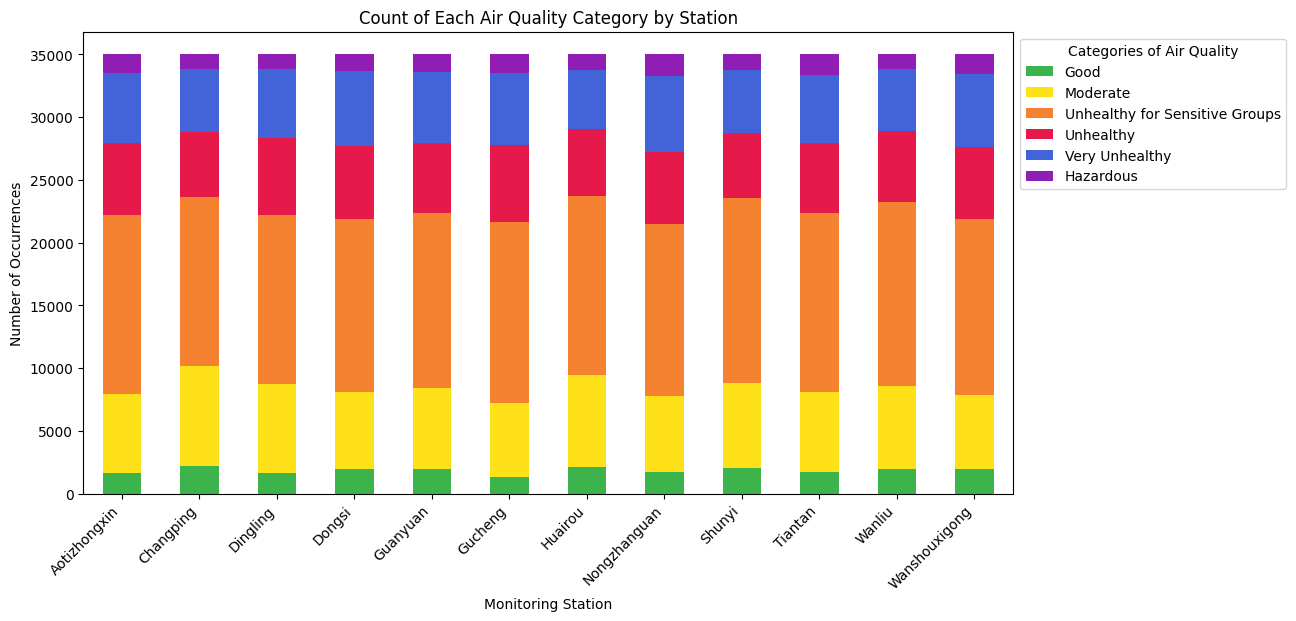

In [67]:
# Define custom colors for each air quality category
colors = ['#3cb44b', '#ffe119', '#f58231', '#e6194B', '#4363d8', '#911eb4']

# Constructing a stacked bar chart
axis = station_category_distribution[aqi_categories].plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Count of Each Air Quality Category by Station')
plt.xlabel('Monitoring Station')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, horizontalalignment='right')

# Positioning the legend outside the chart
plt.legend(title='Categories of Air Quality', loc='upper left', bbox_to_anchor=(1, 1))

# Displaying the chart
plt.show()

> The stacked bar chart depicts AQI (Air Quality Index) categories across various monitoring stations in a specific region, offering insights into air quality and its health impacts. Notably, Changping and Shunyi frequently report "Good" air quality, with 2238 and 2044 counts, respectively, indicating better air conditions compared to other stations. However, Shunyi also shows a high frequency of "Very Unhealthy" air quality days, followed closely by Guanyuan, suggesting periods of significantly poor air quality.

> Stations like Aotizhongxin and Dingling predominantly fall into the "Moderate" air quality category, with counts exceeding 7000, while Guanyuan, Dongsi, and Wanliu have high occurrences in the "Unhealthy" and "Unhealthy for Sensitive Groups" categories, raising concerns for people with respiratory issues in these areas. Conversely, Nongzhanguan and Tiantan exhibit a balanced distribution across various AQI categories, indicating fluctuating air quality.

> Gucheng stands out with a high number of "Hazardous" air quality days, posing a risk to all, whereas Huairou has fewer instances of "Very Unhealthy" air quality, suggesting such extreme conditions are less common there. This data, reflecting a wide range of air quality conditions in the region, is crucial for understanding health risks associated with air pollution and informing public health and environmental policy.

### **3.3 Is it possible to pinpoint likely origins of pollution by analyzing the direction of the wind?**

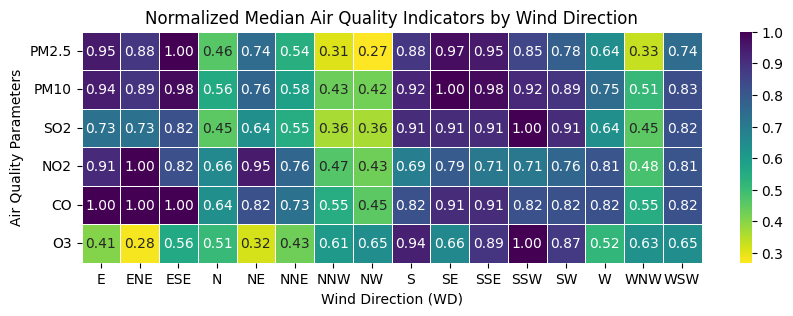

In [68]:
# List of pollutants to analyze
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Computing the median values for each pollutant based on wind direction
median_by_wind_direction = combined_data.groupby('wd')[pollutants].median()

# Normalizing the data by the maximum value in each column
normalized_median_data = median_by_wind_direction / median_by_wind_direction.max()

# Plotting a heatmap of the transposed normalized data
plt.figure(figsize=(10, 3))
sns.heatmap(normalized_median_data.T, cmap="viridis_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Normalized Median Air Quality Indicators by Wind Direction")
plt.xlabel("Wind Direction (WD)")
plt.ylabel("Air Quality Parameters")
plt.show()

> The heatmap showing median values of different air quality parameters across various wind directions reveals key observations:

> For wind directions originating from the east (E, ENE, ESE), southeast (S, SE, SSE), and southwest (SSW, SW, W), levels of PM2.5, PM10, SO2, NO2, and CO are typically higher. In contrast, these pollutants are lower when winds come from the northwest (NW, NNW) and west-northwest (WNW). This pattern may hint at the influence of specific wind directions on the sources and spread of these pollutants.

> Regarding O3 levels, they are notably elevated with winds from the south-southwest directions (SSE, SSW, SW). This could reflect distinct pollution sources or atmospheric chemical reactions.

> In essence, this heatmap offers a comprehensive view of how wind direction correlates with various environmental pollutants. Such insights are valuable for deciphering local air quality trends and may assist in pinpointing pollution sources based on dominant wind patterns.

### **3.4 Do air quality measurements exhibit any periodic variations or trends over different seasons?**

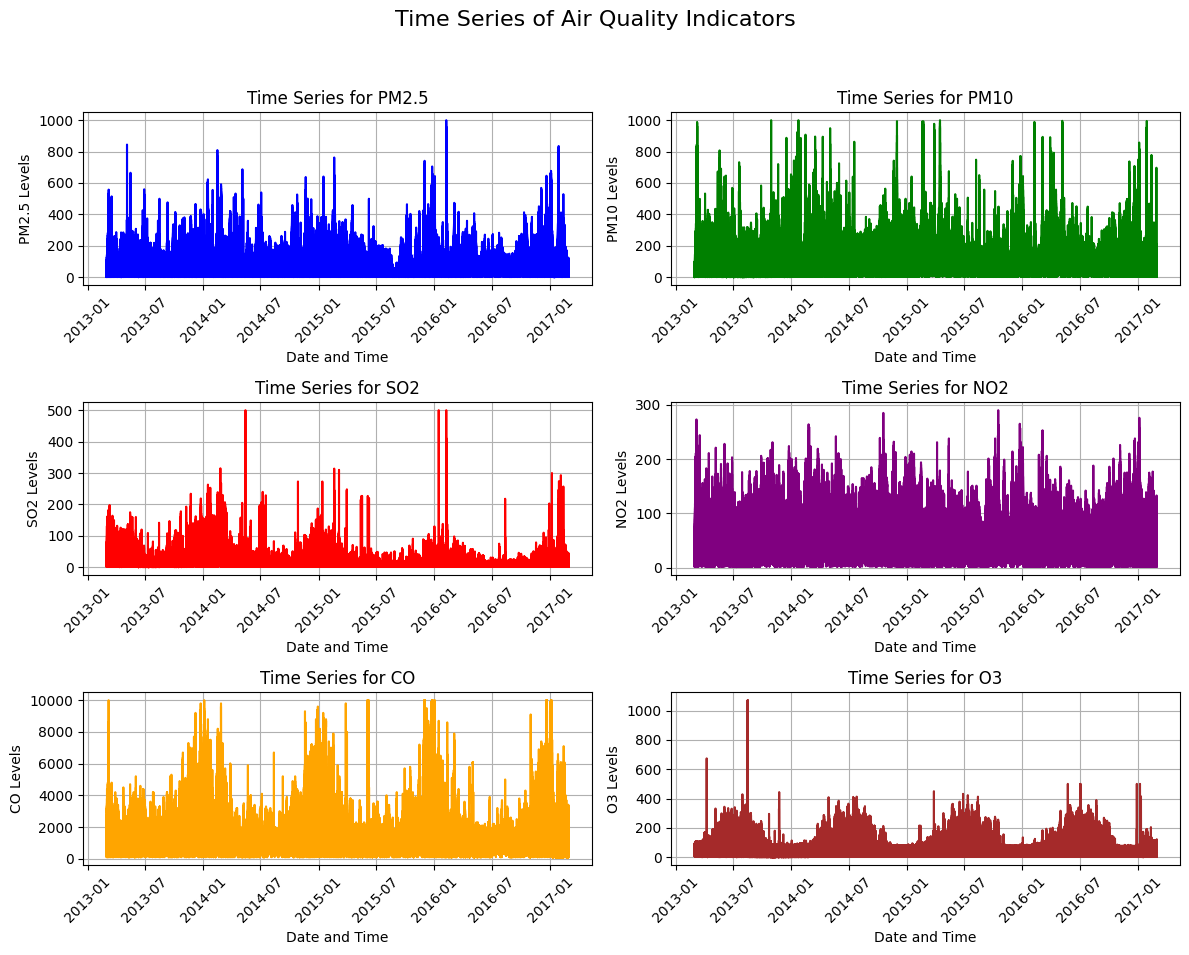

In [69]:
# Define a list of colors for the plots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Set up a grid of plots with 3 rows and 2 columns
fig, plot_axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Time Series of Air Quality Indicators', fontsize=16)

# Iterate over the parameters to generate individual subplots
for index, pollutant in enumerate(pollutants):
    grid_row = index // 2  # Determine the row of the subplot based on index
    grid_col = index % 2   # Determine the column of the subplot based on index
    color = colors[index]  # Select color for current plot

    # Generate the time series plot for each air quality parameter with the selected color
    plot_axes[grid_row, grid_col].plot(combined_data['timestamp'], combined_data[pollutant], linestyle='-', color=color)
    plot_axes[grid_row, grid_col].set_title(f'Time Series for {pollutant}')
    plot_axes[grid_row, grid_col].set_xlabel('Date and Time')
    plot_axes[grid_row, grid_col].set_ylabel(f'{pollutant} Levels')
    plot_axes[grid_row, grid_col].grid(visible=True)
    plot_axes[grid_row, grid_col].tick_params(axis='x', rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all the subplots
plt.show()

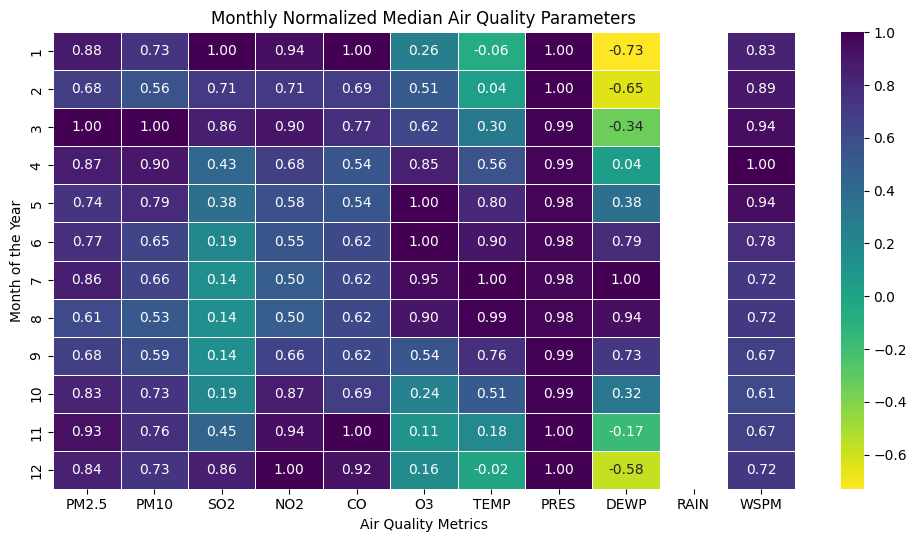

In [70]:
# Determine the median values for each air quality metric by month
monthly_median = combined_data.groupby(combined_data['timestamp'].dt.month).median(numeric_only=True)

# Scale the medians relative to their maximum values for normalization
scaled_monthly_median = monthly_median / monthly_median.max()

# Generate a heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_monthly_median, cmap="viridis_r", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Monthly Normalized Median Air Quality Parameters")
plt.xlabel("Air Quality Metrics")
plt.ylabel("Month of the Year")

# Optimize the layout of the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> The time-series data on air quality parameters reveal several trends:

- Levels of PM2.5, PM10, SO2, and CO usually increase during winter (from November to February), indicating that air quality deteriorates, with higher particulate and gas pollution in the colder seasons.

- O3 concentrations typically reach their highest during the summer (around June to August), reflecting a seasonal pattern in ozone levels.

- The fluctuations in temperature that come with changing seasons are anticipated and play a role in the cyclic trends of air pollutant levels.

- Throughout most of the year, precipitation appears to have a negligible effect on the overall quality of air.

- There's no pronounced seasonal trend observed in wind speed metrics.

- The concentrations of pollutants like PM2.5, PM10, SO2, NO2, and CO change over the year, potentially due to seasonal weather shifts, varying emission rates, and different human activity patterns.

- As temperatures start to climb, pollutants such as PM2.5 and PM10 are generally observed to decrease.

### **3.4 Analyzing variation in air quality across monitoring locations**

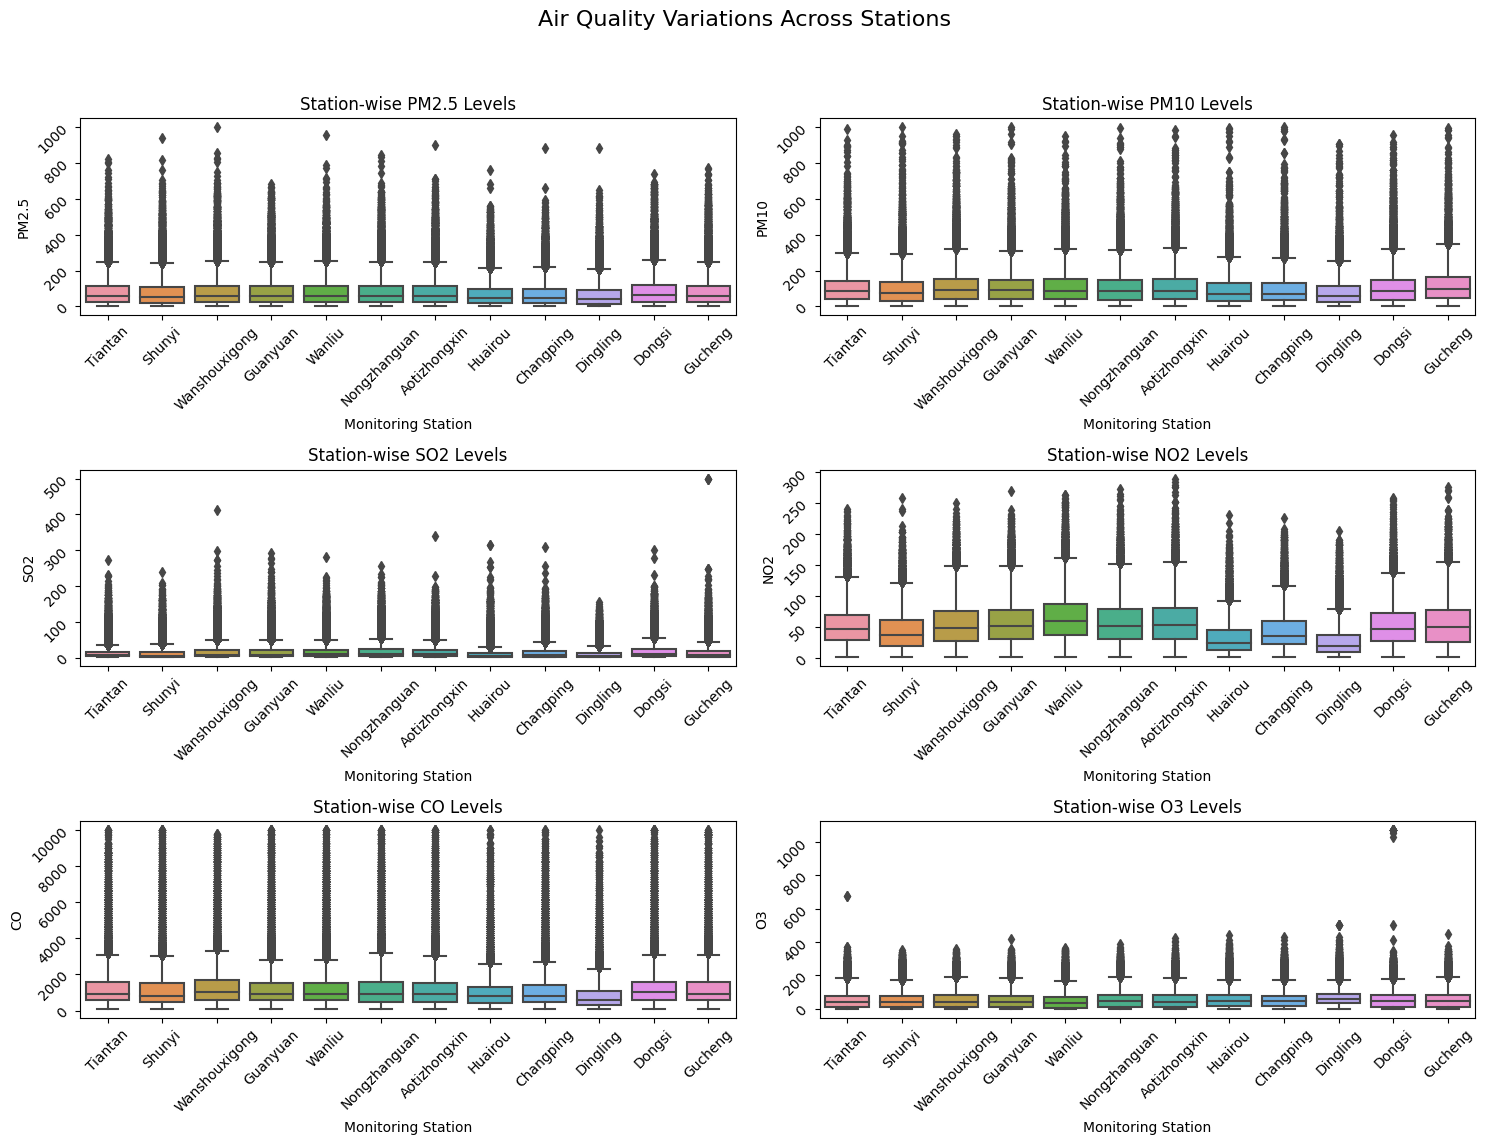

In [71]:
# Set up a 3x2 grid of plots with extra vertical space
figure, plot_axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
figure.suptitle('Air Quality Variations Across Stations', fontsize=16)

# Generate boxplots for each air quality parameter
for idx, pollutant in enumerate(pollutants):
    grid_row = idx // 2
    grid_col = idx % 2

    # Plotting the distribution as boxplots by station
    sns.boxplot(data=combined_data, x='station', y=pollutant, ax=plot_axes[grid_row, grid_col])
    plot_axes[grid_row, grid_col].set_title(f'Station-wise {pollutant} Levels')
    plot_axes[grid_row, grid_col].set_xlabel('Monitoring Station')
    plot_axes[grid_row, grid_col].set_ylabel(pollutant)

# Adjust x-axis labels for clarity
for subplot in plot_axes.flatten():
    subplot.tick_params(labelrotation=45)

# Adjust overall layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the figure with plots
plt.show()

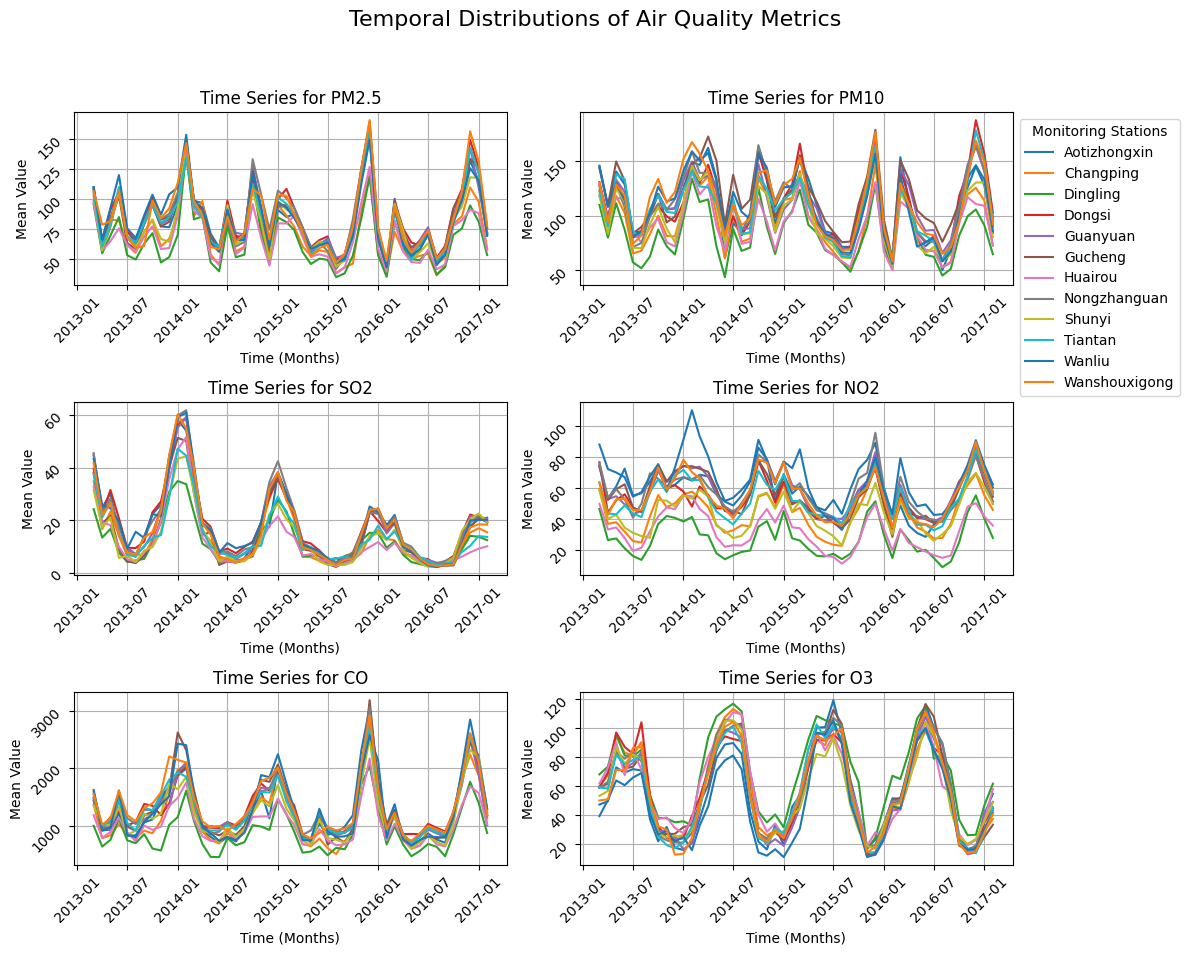

In [72]:
# Parsing 'timestamp' column to timestamp type
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

# Construct a 3x2 grid for time series plots
figure, time_axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
figure.suptitle('Temporal Distributions of Air Quality Metrics', fontsize=16)

# Prepare legend items
legend_items = []

# Plot the average parameter value by month for each station
for idx, pollutant in enumerate(pollutants):
    grid_row = idx // 2
    grid_col = idx % 2

    # Group and plot data by month and station
    station_grouped = combined_data.groupby([combined_data['timestamp'].dt.to_period("M"), 'station'])[pollutant].mean().unstack()
    for station in station_grouped:
        line_plot, = time_axes[grid_row, grid_col].plot(station_grouped.index.to_timestamp(), station_grouped[station], label=station)
        if grid_row == 0 and grid_col == 0:
            legend_items.append(line_plot)

    time_axes[grid_row, grid_col].set_title(f'Time Series for {pollutant}')
    time_axes[grid_row, grid_col].set_xlabel('Time (Months)')
    time_axes[grid_row, grid_col].set_ylabel('Mean Value')
    time_axes[grid_row, grid_col].grid(True)
    time_axes[grid_row, grid_col].tick_params(labelrotation=45)

    # Positioning a unified legend
    if grid_row == 0 and grid_col == 1:
        time_axes[grid_row, grid_col].legend(title='Monitoring Stations', bbox_to_anchor=(1, 1))

# Fine-tune the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

> The analysis of air quality metrics across different monitoring stations offers various observations:

- The stations at Shunyi and Wanliu report elevated levels of PM2.5 and PM10, implying that air quality may be notably poorer in these areas due to higher concentrations of particulate matter.

- SO2 concentrations are comparatively low at all measured sites, suggesting that SO2-related pollution is not a predominant issue in these regions.

- Notably higher concentrations of NO2 are observed at the Aotizhongxin, Wanliu, and Wanshouxigong stations.

- The Tiantan and Wanshouxigong locations record higher levels of CO.

- Stations like Dingling and Huairou are characterized by increased O3 levels.